## building raster readers, tight boundary extractors and density checks

In [30]:
import fiona
from shapely import geometry, wkt
from shapely.geometry import shape
from shapely.ops import transform, cascaded_union
import numpy as np

import rasterio
from rasterio import features

import json
import geojson

from functools import partial
import pyproj
import utm

import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
inputgeotiff="/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m.tiff"

In [54]:
dataset = rasterio.open(inputgeotiff)

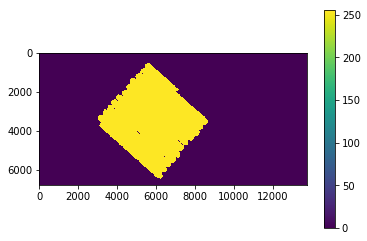

In [55]:
plt.imshow(dataset.dataset_mask())
plt.colorbar()

In [102]:
mask = dataset.dataset_mask()

In [104]:
dataset.nodatavals

(3.4028234663852886e+38,)

In [105]:
dataset.nodata

3.4028234663852886e+38

In [57]:
mask.shape

(6799, 13781)

In [98]:
thedata = mask[mask <= 0]

In [99]:
thedata.shape

(76246078,)

In [114]:
datahere = mask[mask > 0]

In [119]:
mask[mask > 0].shape[0]

17450941

In [116]:
datahere.shape

(17450941,)

In [118]:
datahere.shape[0]

17450941

In [5]:
dataset.transform

Affine(1.0, 0.0, 489015.5,
       0.0, -1.0, 5627111.5)

In [6]:
dataset.dataset_mask()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
dataset.meta["crs"]

In [8]:
dataset.crs

In [18]:
bbox = dataset.bounds

In [24]:
bbox[2] - bbox[0]

12764.0

In [13]:
dataset.units

(None,)

In [60]:
dataset.width

13781

In [83]:
dataset.height

6799

In [84]:
dataset.width * dataset.height

93697019

In [86]:
nodata = len(np.ravel(np.where(dataset.dataset_mask() <= 0)))

In [87]:
data = len(np.ravel(np.where(dataset.dataset_mask() > 0)))

In [89]:
data + nodata

187394038

In [91]:
data

34901882

In [92]:
nodata

152492156

In [73]:
boundaries = features.shapes(dataset.dataset_mask(), transform=dataset.transform)


In [74]:
listofpolygons = [shape(bound[0]) for bound in boundaries]

In [75]:
for bound in boundaries:
    listofpolygons.append(shape(bound[0]))

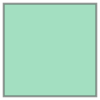

In [76]:
listofpolygons[0]

In [77]:
multipoly = cascaded_union(listofpolygons[:-1])

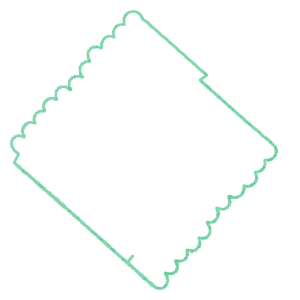

In [78]:
multipoly.boundary

In [80]:
multipoly.area

17465008.0

In [108]:
datahere.shape

(17450941,)

In [27]:
multipoly.centroid.xy

(array('d', [495022.0009419228]), array('d', [5623911.603936483]))

In [ ]:
dataset.close()

In [ ]:
import fiona
import json


In [ ]:
inputfile = '../tests/geotiff-test-grid1.shp'
with fiona.open(inputfile, 'r') as jsonfile:
    this = jsonfile[0]['geometry']
    that = jsonfile[0]
    print(jsonfile.crs)

In [ ]:
this

In [ ]:
that.crs

In [ ]:
str(json.dumps(this))

In [ ]:
inputfile_s = '../tests/testshp.shp'
with fiona.open(inputfile_s, 'r') as shpfile:
    this = shpfile[0]['geometry']
    that = shpfile[0]
    other = shpfile.crs

In [ ]:
this

In [ ]:
that.values()

In [ ]:
other

In [66]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/mnt/bigdata/frontierSI/qa4mbes-data-pipeline/qa4mbes')

In [67]:
import getgridcoverage
from geotransforms import tolatlon

In [71]:
coverage = getgridcoverage.getgridcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m.tiff')

In [72]:
coverage

'{"type": "MultiPolygon", "coordinates": [[[[147.22813413518367, -39.25836897409096], [147.22816890705366, -39.25836890597154], [147.2281689654724, -39.25838692774164], [147.22813419359352, -39.25838699586109], [147.22813413518367, -39.25836897409096]]], [[[147.22807492658683, -39.25798161952735], [147.22810969826557, -39.257981551426184], [147.22810972746694, -39.25799056231185], [147.2280981369059, -39.25799058501341], [147.22809816610584, -39.25799959589909], [147.2280749849807, -39.25799964129875], [147.22807492658683, -39.25798161952735]]], [[[147.22787613679296, -39.25744135206229], [147.22789931773454, -39.25744130670273], [147.22789937608235, -39.257459328476045], [147.2278877856086, -39.2574593511564], [147.22787619513485, -39.25745937383561], [147.2278762243058, -39.25746838472226], [147.22785304335525, -39.25746843007723], [147.22785301418727, -39.25745941919058], [147.22786460466105, -39.25745939651366], [147.2278645754916, -39.257450385626996], [147.2278761659639, -39.2574

In [5]:
import getpointcoverage

In [6]:
pointcoverage = getpointcoverage.getpointcoverage('../tests/lasdata/4819-100000lines-nocrs.laz')

In [7]:
type(pointcoverage)

str

In [ ]:
dataset.crs.to_string()

In [ ]:
if dataset.crs.to_epsg() != 4326:
    print('transforming')
    thepoly = tolatlon(multipoly, dataset.crs.to_string())

In [ ]:
thepoly